In [1]:
import numpy as np
# import sympy as sym
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [17]:
def diff(domainl=2,gridn=43,gridt=500,D=0.1,r=0.45,initial = 'default',bc = 'flux',theta = 1.):
    dx      = domainl / (gridn-2-1)
    dt      = r * dx**2/D
    c       = np.zeros([gridn,gridt])   # c 1 - 41  ; c[0] c[42] ghost point
    x       = np.empty(gridn)           # x 1 - 41  ; x[0] x[42] ghost point
    x[1:gridn-1] = np.linspace(-1,1,gridn-2)
    x[0] = np.nan
    x[-1] = np.nan
    if(initial=='default'):
        # initial c
        print("initial way is default")
        ind_c      = (x>-0.3)&(x<0.3)
        c[ind_c,0] = 1.
    if(initial=='sin'):
        # initial c
        print("initial way is c=sin(2pi*x)")
        c[1:gridn-1,0] = np.sin(2*np.pi*x[1:gridn-1])

    # report
    if(bc=='flux'):
            print("B.C. type is flux")
    if(bc=='dirchlet'):
            print("B.C. type is dirchlet")
    # diff
    for nt in range(0,gridt-1):
        # flux B.C
        if(bc=='flux'):
            c[42,nt] = c[40,nt]
            c[0,nt]  = c[2,nt]
        # dirchlet B.C
        if(bc=='dirchlet'):
            c[0,nt] = 2*0-c[2,nt]
            c[42,nt]= 2*0-c[40,nt] 
        for jx in range(1,gridn-1): 
            c[jx,nt+1] = (1-2*r)*c[jx,nt] + r*c[jx+1,nt] + r*c[jx-1,nt]
    return c

In [29]:
domainl = 2.     # from -1 to 1
gridn   = 41 + 2 # 40 cells; 41 points; 42 for python(0-42 number)
gridt   = 500    #
D       = 0.1
r       = 0.45 # D * delta t / delta x ^2
dx      = domainl / (gridn-2-1)
dt      = r * dx**2/D
x       = np.empty(gridn)           # x 1 - 41  ; x[0] x[42] ghost point
x[1:gridn-1] = np.linspace(-1,1,gridn-2)
x[0] = np.nan
x[-1] = np.nan

# diff P1
c_res1 = diff()

initial way is default
B.C. type is flux


In [28]:
# diff P2
c_res2 = diff(initial='sin',bc='dirchlet')

initial way is c=sin(2pi*x)
B.C. type is dirchlet


Text(0, 0.5, 'c')

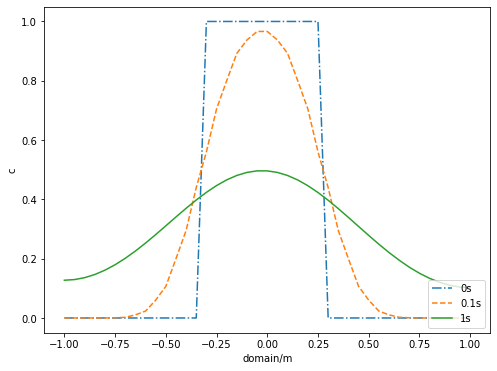

In [27]:
fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (3, 4)
# custom_ylim = (0, 1.1)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(x[1:gridn-1], c_res1[1:42,int(np.rint(0./dt))],'-.', label='0s')
ax.plot(x[1:gridn-1], c_res1[1:42,int(np.rint(0.1/dt))],'--', label='0.1s')
ax.plot(x[1:gridn-1], c_res1[1:42,int(np.rint(1./dt))],'-', label='1s')

ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
# plt.savefig('./p3t1_filt0.05_cr=1.png')
    # ax[nn].legend(')

Text(0, 0.5, 'c')

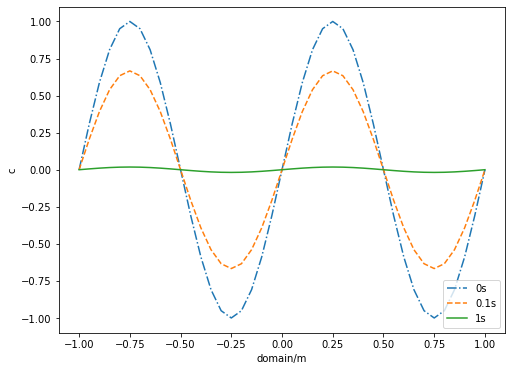

In [30]:
fig,ax = plt.subplots(1,figsize=(8,6))
# custom_xlim = (3, 4)
# custom_ylim = (0, 1.1)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.plot(x[1:gridn-1], c_res2[1:42,int(np.rint(0./dt))],'-.', label='0s')
ax.plot(x[1:gridn-1], c_res2[1:42,int(np.rint(0.1/dt))],'--', label='0.1s')
ax.plot(x[1:gridn-1], c_res2[1:42,int(np.rint(1./dt))],'-', label='1s')

ax.legend(loc='lower right')
plt.xlabel('domain/m')
plt.ylabel('c')
# plt.savefig('./p3t1_filt0.05_cr=1.png')
    # ax[nn].legend(')